## Data Loading and Cleaning

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from tabulate import tabulate

# Load the dataset from the provided Excel file
file_path = 'C:\\Users\\Benedict\\Desktop\\Business Analytics and Econometrics\\SS24\\Topics in Econometrics and Statistics\\Term Paper\\BNetzA\\Data\\EVS4_20140118_dataV9.xlsx'
sheet_name = 'DatasetV9'

print("Loading dataset...")
data = pd.read_excel(file_path, sheet_name=sheet_name)

print("Dropping irrelevant columns and columns with more than 50% missing or zero values...")
# Drop irrelevant columns and columns with more than 50% missing or zero values
threshold = 0.5 * len(data)
columns_to_drop = ['cTOTEXs', 'cTOTEXs_RP3', 'cTOTEXn_RP3', 'NameOrg', 'NameShort', 'dmuName', 'BNR']

for col in data.columns:
    if (data[col].isnull().sum() + (data[col] == 0).sum()) > threshold:
        columns_to_drop.append(col)

data_cleaned = data.drop(columns=columns_to_drop)

print("Converting date columns to datetime...")
# Convert date columns to datetime
data_cleaned['dDateData'] = pd.to_datetime(data_cleaned['dDateData'], format='%d.%m.%Y', errors='coerce')

print("Imputing missing values in numerical columns with the mean...")
# Identify numerical and non-numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
non_numerical_columns = data_cleaned.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

for col in numerical_columns:
    data_cleaned[col].fillna(data_cleaned[col].mean(), inplace=True)

print("Splitting the data into training and testing sets...")
# Splitting the data into train and test sets
X = data_cleaned.drop(columns=['cTOTEXn', 'BNR_NNR', 'dDateData'])
y = data_cleaned['cTOTEXn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading dataset...
Dropping irrelevant columns and columns with more than 50% missing or zero values...
Converting date columns to datetime...
Imputing missing values in numerical columns with the mean...
Splitting the data into training and testing sets...


## Lasso Regression for Feature Selection

In [3]:
print("Performing Lasso regression for feature selection...")

# Performing Lasso regression for feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
selected_features_lasso = X_train.columns[(lasso.coef_ != 0)]

print(f"Selected features by Lasso ({len(selected_features_lasso)}): {selected_features_lasso}")

# Training the final model with selected features
lr_lasso = LinearRegression()
lr_lasso.fit(X_train[selected_features_lasso], y_train)

print("Predicting on the training and test data (Lasso)...")
# Predicting on the train and test data
y_train_pred_lasso = lr_lasso.predict(X_train[selected_features_lasso])
y_test_pred_lasso = lr_lasso.predict(X_test[selected_features_lasso])

print("Evaluating the model (Lasso)...")
# Evaluating the model on train data
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
train_rmse_lasso = np.sqrt(train_mse_lasso)
train_mae_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)

# Evaluating the model on test data
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
test_rmse_lasso = np.sqrt(test_mse_lasso)
test_mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

# Formatting the results to 4 decimal places and avoiding scientific notation
results_lasso = [
    ["Lasso", "Training MSE", f"{train_mse_lasso:.4f}"],
    ["Lasso", "Training RMSE", f"{train_rmse_lasso:.4f}"],
    ["Lasso", "Training MAE", f"{train_mae_lasso:.4f}"],
    ["Lasso", "Training R2", f"{train_r2_lasso:.4f}"],
    ["Lasso", "Testing MSE", f"{test_mse_lasso:.4f}"],
    ["Lasso", "Testing RMSE", f"{test_rmse_lasso:.4f}"],
    ["Lasso", "Testing MAE", f"{test_mae_lasso:.4f}"],
    ["Lasso", "Testing R2", f"{test_r2_lasso:.4f}"]
]


Performing Lasso regression for feature selection...
Selected features by Lasso (4): Index(['yInjection.tot', 'yInjection.generation.tot', 'yEnergy.delivered.tot',
       'yEnergy.delivered.N1357.sum'],
      dtype='object')
Predicting on the training and test data (Lasso)...
Evaluating the model (Lasso)...


## Ridge Regression for Feature Selection

In [4]:
print("Performing Ridge regression for feature selection...")

# Performing Ridge regression for feature selection
ridge = RidgeCV(cv=5).fit(X_train, y_train)
selected_features_ridge = X_train.columns[(ridge.coef_ != 0)]

print(f"Selected features by Ridge ({len(selected_features_ridge)}): {selected_features_ridge}")

# Training the final model with selected features
lr_ridge = LinearRegression()
lr_ridge.fit(X_train[selected_features_ridge], y_train)

print("Predicting on the training and test data (Ridge)...")
# Predicting on the train and test data
y_train_pred_ridge = lr_ridge.predict(X_train[selected_features_ridge])
y_test_pred_ridge = lr_ridge.predict(X_test[selected_features_ridge])

print("Evaluating the model (Ridge)...")
# Evaluating the model on train data
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
train_rmse_ridge = np.sqrt(train_mse_ridge)
train_mae_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)

# Evaluating the model on test data
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_rmse_ridge = np.sqrt(test_mse_ridge)
test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

# Formatting the results to 4 decimal places and avoiding scientific notation
results_ridge = [
    ["Ridge", "Training MSE", f"{train_mse_ridge:.4f}"],
    ["Ridge", "Training RMSE", f"{train_rmse_ridge:.4f}"],
    ["Ridge", "Training MAE", f"{train_mae_ridge:.4f}"],
    ["Ridge", "Training R2", f"{train_r2_ridge:.4f}"],
    ["Ridge", "Testing MSE", f"{test_mse_ridge:.4f}"],
    ["Ridge", "Testing RMSE", f"{test_rmse_ridge:.4f}"],
    ["Ridge", "Testing MAE", f"{test_mae_ridge:.4f}"],
    ["Ridge", "Testing R2", f"{test_r2_ridge:.4f}"]
]


Performing Ridge regression for feature selection...


C:\Users\Benedict\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Benedict\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Benedict\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=3.72951e-20): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\Benedict\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

Selected features by Ridge (365): Index(['dmu', 'yConnections.N4', 'yConnections.N5', 'yConnections.N6',
       'yConnections.N7', 'yConnections.tot', 'yConnections.streetlights.N7',
       'yConnections.streetlights.sum', 'yConnections.excl.streetlights.tot',
       'yConnections.cus.N5',
       ...
       'rMeters.read.per.connection.N7', 'rUsageHours.injection.N4',
       'rUsageHours.injection.N5', 'rUsageHours.injection.N6',
       'rUsageHours.injection.N7', 'rUsageHours.delivered.N4',
       'rUsageHours.delivered.N5', 'rUsageHours.delivered.N6',
       'rUsageHours.delivered.N7', 'rUsageHours.delivered.tot'],
      dtype='object', length=365)
Predicting on the training and test data (Ridge)...
Evaluating the model (Ridge)...


C:\Users\Benedict\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=3.72951e-20): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\Benedict\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Benedict\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=2.33851e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\Benedict\AppData\Local\Packages\Python

## Elastic Net for Feature Selection

In [5]:
print("Performing Elastic Net regression for feature selection...")

# Performing Elastic Net regression for feature selection
elastic_net = ElasticNetCV(cv=5, random_state=42).fit(X_train, y_train)
selected_features_elastic = X_train.columns[(elastic_net.coef_ != 0)]

print(f"Selected features by Elastic Net ({len(selected_features_elastic)}): {selected_features_elastic}")

# Training the final model with selected features
lr_elastic = LinearRegression()
lr_elastic.fit(X_train[selected_features_elastic], y_train)

print("Predicting on the training and test data (Elastic Net)...")
# Predicting on the train and test data
y_train_pred_elastic = lr_elastic.predict(X_train[selected_features_elastic])
y_test_pred_elastic = lr_elastic.predict(X_test[selected_features_elastic])

print("Evaluating the model (Elastic Net)...")
# Evaluating the model on train data
train_mse_elastic = mean_squared_error(y_train, y_train_pred_elastic)
train_rmse_elastic = np.sqrt(train_mse_elastic)
train_mae_elastic = mean_absolute_error(y_train, y_train_pred_elastic)
train_r2_elastic = r2_score(y_train, y_train_pred_elastic)

# Evaluating the model on test data
test_mse_elastic = mean_squared_error(y_test, y_test_pred_elastic)
test_rmse_elastic = np.sqrt(test_mse_elastic)
test_mae_elastic = mean_absolute_error(y_test, y_test_pred_elastic)
test_r2_elastic = r2_score(y_test, y_test_pred_elastic)

# Formatting the results to 4 decimal places and avoiding scientific notation
results_elastic = [
    ["Elastic Net", "Training MSE", f"{train_mse_elastic:.4f}"],
    ["Elastic Net", "Training RMSE", f"{train_rmse_elastic:.4f}"],
    ["Elastic Net", "Training MAE", f"{train_mae_elastic:.4f}"],
    ["Elastic Net", "Training R2", f"{train_r2_elastic:.4f}"],
    ["Elastic Net", "Testing MSE", f"{test_mse_elastic:.4f}"],
    ["Elastic Net", "Testing RMSE", f"{test_rmse_elastic:.4f}"],
    ["Elastic Net", "Testing MAE", f"{test_mae_elastic:.4f}"],
    ["Elastic Net", "Testing R2", f"{test_r2_elastic:.4f}"]
]

Performing Elastic Net regression for feature selection...
Selected features by Elastic Net (4): Index(['yInjection.tot', 'yInjection.generation.tot', 'yEnergy.delivered.tot',
       'yEnergy.delivered.N1357.sum'],
      dtype='object')
Predicting on the training and test data (Elastic Net)...
Evaluating the model (Elastic Net)...


## Random Forest for Feature Selection

In [6]:
print("Performing Random Forest for feature importance...")

# Performing Random Forest for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features_rf = X_train.columns[indices[:len(selected_features_elastic)]]

print(f"Selected features by Random Forest ({len(selected_features_rf)}): {selected_features_rf}")

# Training the final model with selected features
lr_rf = LinearRegression()
lr_rf.fit(X_train[selected_features_rf], y_train)

print("Predicting on the training and test data (Random Forest)...")
# Predicting on the train and test data
y_train_pred_rf = lr_rf.predict(X_train[selected_features_rf])
y_test_pred_rf = lr_rf.predict(X_test[selected_features_rf])

print("Evaluating the model (Random Forest)...")
# Evaluating the model on train data
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# Evaluating the model on test data
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Formatting the results to 4 decimal places and avoiding scientific notation
results_rf = [
    ["Random Forest", "Training MSE", f"{train_mse_rf:.4f}"],
    ["Random Forest", "Training RMSE", f"{train_rmse_rf:.4f}"],
    ["Random Forest", "Training MAE", f"{train_mae_rf:.4f}"],
    ["Random Forest", "Training R2", f"{train_r2_rf:.4f}"],
    ["Random Forest", "Testing MSE", f"{test_mse_rf:.4f}"],
    ["Random Forest", "Testing RMSE", f"{test_rmse_rf:.4f}"],
    ["Random Forest", "Testing MAE", f"{test_mae_rf:.4f}"],
    ["Random Forest", "Testing R2", f"{test_r2_rf:.4f}"]
]


Performing Random Forest for feature importance...
Selected features by Random Forest (4): Index(['yEnergy.delivered.net.N5to7.sum', 'yEnergy.delivered.N5',
       'yEnergy.delivered.N1357.sum', 'yInjection.N5'],
      dtype='object')
Predicting on the training and test data (Random Forest)...
Evaluating the model (Random Forest)...


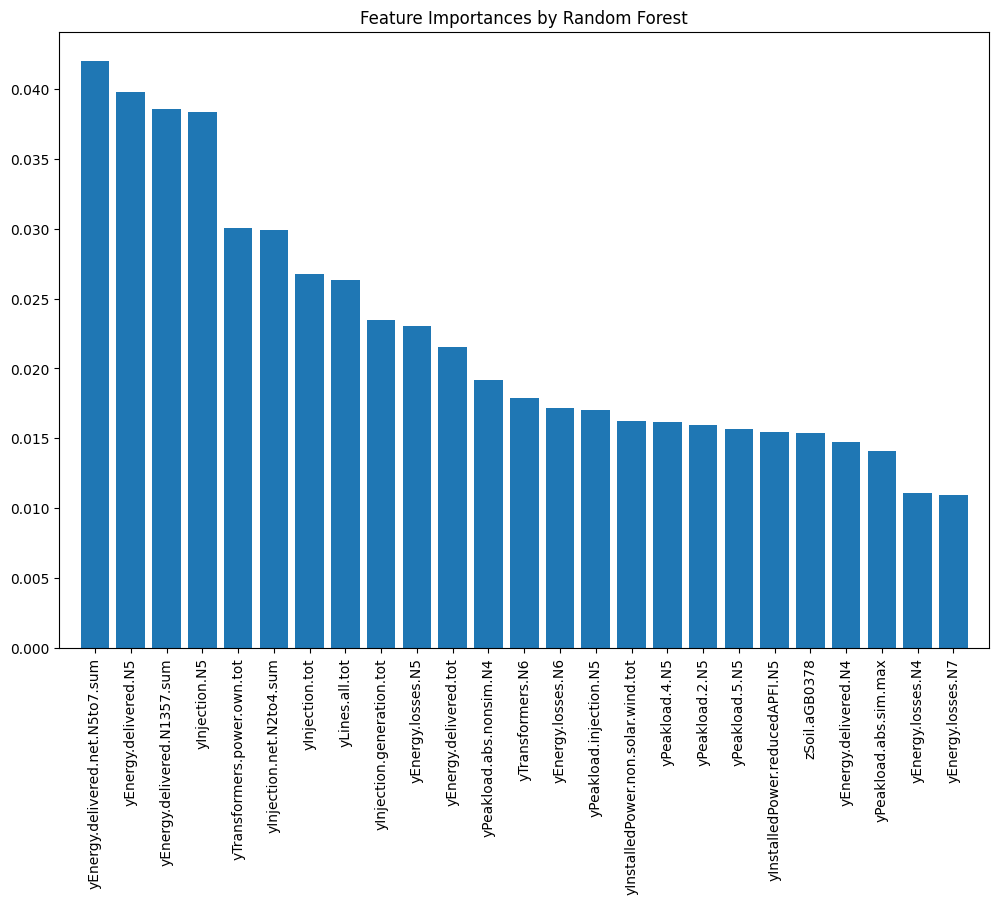

Significant Feature Importances by Random Forest:
                               Feature  Importance
0      yEnergy.delivered.net.N5to7.sum    0.042014
1                 yEnergy.delivered.N5    0.039804
2          yEnergy.delivered.N1357.sum    0.038569
3                        yInjection.N5    0.038354
4          yTransformers.power.own.tot    0.030019
5             yInjection.net.N2to4.sum    0.029923
6                       yInjection.tot    0.026770
7                       yLines.all.tot    0.026363
8            yInjection.generation.tot    0.023480
9                    yEnergy.losses.N5    0.023009
10               yEnergy.delivered.tot    0.021523
11             yPeakload.abs.nonsim.N4    0.019161
12                    yTransformers.N6    0.017900
13                   yEnergy.losses.N6    0.017133
14              yPeakload.injection.N5    0.017016
15  yInstalledPower.non.solar.wind.tot    0.016255
16                      yPeakload.4.N5    0.016164
17                      yPeakloa

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Define a threshold for significance
threshold = 0.01

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns[indices]

# Filter significant features
significant_indices = indices[importances[indices] > threshold]
significant_importances = importances[significant_indices]
significant_feature_names = feature_names[importances[indices] > threshold]

# Plot significant feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances by Random Forest")
plt.bar(range(len(significant_indices)), significant_importances, align="center")
plt.xticks(range(len(significant_indices)), significant_feature_names, rotation=90)
plt.xlim([-1, len(significant_indices)])
plt.show()

# Print significant feature importances
importance_df = pd.DataFrame({
    'Feature': significant_feature_names,
    'Importance': significant_importances
})

print("Significant Feature Importances by Random Forest:")
print(importance_df)


## Summary Table for Comparison

In [16]:
# Combine all results into a single summary table
results_summary = results_lasso + results_ridge + results_elastic + results_rf

# Create a DataFrame for better visualization
df_results_summary = pd.DataFrame(results_summary, columns=["Method", "Metric", "Value"])

# Pivot the table for a better comparison format
df_results_pivot = df_results_summary.pivot(index="Metric", columns="Method", values="Value")

print("Summary of all methods:")
print(tabulate(df_results_pivot, headers="keys", tablefmt="pipe", floatfmt=".4f"))

# Optionally, save the results to a CSV file
df_results_pivot.to_csv("model_comparison_summary.csv")


Summary of all methods:
| Metric        |           Elastic Net |                 Lasso |         Random Forest |                  Ridge |
|:--------------|----------------------:|----------------------:|----------------------:|-----------------------:|
| Testing MAE   |         22623023.3861 |         22623023.3861 |         15375129.9928 |          58357201.3060 |
| Testing MSE   | 3874778843650517.5000 | 3874778843650517.5000 | 2190455187736438.5000 | 20909121191533836.0000 |
| Testing R2    |                0.9158 |                0.9158 |                0.9524 |                 0.5455 |
| Testing RMSE  |         62247721.5941 |         62247721.5941 |         46802298.9578 |         144599865.8075 |
| Training MAE  |          7591577.6489 |          7591577.6489 |          6858856.9122 |                 0.0131 |
| Training MSE  |  223829559193262.0312 |  223829559193262.0312 |  245172344845272.2500 |                 0.0008 |
| Training R2   |                0.9866 |               

## Support Vector Regression (SVR)

In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Use the features selected by Random Forest
selected_features_rf = X_train.columns[rf.feature_importances_ > 0.01]
X_train_rf_selected = X_train[selected_features_rf]
X_test_rf_selected = X_test[selected_features_rf]

# Define a pipeline with scaling and SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Define hyperparameter grid for SVR
param_grid = {
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 1, 10]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train_rf_selected, y_train)

# Best model and evaluation
best_svr = grid_search.best_estimator_

print("Best SVR parameters:", grid_search.best_params_)

# Predicting on the train and test data
y_train_pred_svr = best_svr.predict(X_train_rf_selected)
y_test_pred_svr = best_svr.predict(X_test_rf_selected)

print("Evaluating the model (SVR)...")
# Evaluating the model on train data
train_mse_svr = mean_squared_error(y_train, y_train_pred_svr)
train_rmse_svr = np.sqrt(train_mse_svr)
train_mae_svr = mean_absolute_error(y_train, y_train_pred_svr)
train_r2_svr = r2_score(y_train, y_train_pred_svr)

# Evaluating the model on test data
test_mse_svr = mean_squared_error(y_test, y_test_pred_svr)
test_rmse_svr = np.sqrt(test_mse_svr)
test_mae_svr = mean_absolute_error(y_test, y_test_pred_svr)
test_r2_svr = r2_score(y_test, y_test_pred_svr)

# Formatting the results to 4 decimal places and avoiding scientific notation
results_svr = [
    ["SVR", "Training MSE", f"{train_mse_svr:.4f}"],
    ["SVR", "Training RMSE", f"{train_rmse_svr:.4f}"],
    ["SVR", "Training MAE", f"{train_mae_svr:.4f}"],
    ["SVR", "Training R2", f"{train_r2_svr:.4f}"],
    ["SVR", "Testing MSE", f"{test_mse_svr:.4f}"],
    ["SVR", "Testing RMSE", f"{test_rmse_svr:.4f}"],
    ["SVR", "Testing MAE", f"{test_mae_svr:.4f}"],
    ["SVR", "Testing R2", f"{test_r2_svr:.4f}"]
]

# Printing results for SVR
print(tabulate(results_svr, headers=["Metric", "Value"], tablefmt="pipe", floatfmt=".4f"))


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best SVR parameters: {'svr__C': 100, 'svr__epsilon': 0.01, 'svr__kernel': 'poly'}
Evaluating the model (SVR)...
|     | Metric        |                  Value |
|:----|:--------------|-----------------------:|
| SVR | Training MSE  | 18072372801719268.0000 |
| SVR | Training RMSE |         134433525.5869 |
| SVR | Training MAE  |          46938470.3717 |
| SVR | Training R2   |                -0.0853 |
| SVR | Testing MSE   | 47968393637933376.0000 |
| SVR | Testing RMSE  |         219016879.8014 |
| SVR | Testing MAE   |          80676543.3894 |
| SVR | Testing R2    |                -0.0426 |


## XGBoost Regression

In [23]:
from xgboost import XGBRegressor

# Use the features selected by Random Forest
selected_features_rf = X_train.columns[rf.feature_importances_ > 0.01]
X_train_rf_selected = X_train[selected_features_rf]
X_test_rf_selected = X_test[selected_features_rf]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rf_selected)
X_test_scaled = scaler.transform(X_test_rf_selected)

# Define and train the XGBoost model
xgbr = XGBRegressor(n_estimators=100, random_state=42)
xgbr.fit(X_train_scaled, y_train)

# Predicting on the train and test data
y_train_pred_xgbr = xgbr.predict(X_train_scaled)
y_test_pred_xgbr = xgbr.predict(X_test_scaled)

print("Evaluating the model (XGBoost)...")
# Evaluating the model on train data
train_mse_xgbr = mean_squared_error(y_train, y_train_pred_xgbr)
train_rmse_xgbr = np.sqrt(train_mse_xgbr)
train_mae_xgbr = mean_absolute_error(y_train, y_train_pred_xgbr)
train_r2_xgbr = r2_score(y_train, y_train_pred_xgbr)

# Evaluating the model on test data
test_mse_xgbr = mean_squared_error(y_test, y_test_pred_xgbr)
test_rmse_xgbr = np.sqrt(test_mse_xgbr)
test_mae_xgbr = mean_absolute_error(y_test, y_test_pred_xgbr)
test_r2_xgbr = r2_score(y_test, y_test_pred_xgbr)

# Formatting the results to 4 decimal places and avoiding scientific notation
results_xgbr = [
    ["XGBoost", "Training MSE", f"{train_mse_xgbr:.4f}"],
    ["XGBoost", "Training RMSE", f"{train_rmse_xgbr:.4f}"],
    ["XGBoost", "Training MAE", f"{train_mae_xgbr:.4f}"],
    ["XGBoost", "Training R2", f"{train_r2_xgbr:.4f}"],
    ["XGBoost", "Testing MSE", f"{test_mse_xgbr:.4f}"],
    ["XGBoost", "Testing RMSE", f"{test_rmse_xgbr:.4f}"],
    ["XGBoost", "Testing MAE", f"{test_mae_xgbr:.4f}"],
    ["XGBoost", "Testing R2", f"{test_r2_xgbr:.4f}"]
]

# Printing results for XGBoost
print(tabulate(results_xgbr, headers=["Metric", "Value"], tablefmt="pipe", floatfmt=".4f"))


Evaluating the model (XGBoost)...
|         | Metric        |                 Value |
|:--------|:--------------|----------------------:|
| XGBoost | Training MSE  |           194794.9032 |
| XGBoost | Training RMSE |              441.3558 |
| XGBoost | Training MAE  |              288.3445 |
| XGBoost | Training R2   |                1.0000 |
| XGBoost | Testing MSE   | 3687269326013664.5000 |
| XGBoost | Testing RMSE  |         60722889.6382 |
| XGBoost | Testing MAE   |         21415933.0430 |
| XGBoost | Testing R2    |                0.9199 |


## New Summary Table for All Methods

In [24]:
# Combine all results into a single summary table
results_summary = results_lasso + results_ridge + results_elastic + results_rf + results_svr + results_xgbr

# Create a DataFrame for better visualization
df_results_summary = pd.DataFrame(results_summary, columns=["Method", "Metric", "Value"])

# Pivot the table for a better comparison format
df_results_pivot = df_results_summary.pivot(index="Metric", columns="Method", values="Value")

# Reorder the columns from less complex to more complex methods
ordered_columns = ["Lasso", "Ridge", "Elastic Net", "Random Forest", "SVR", "XGBoost"]
df_results_pivot = df_results_pivot[ordered_columns]

print("Summary of all methods:")
print(tabulate(df_results_pivot, headers="keys", tablefmt="pipe", floatfmt=".4f"))

# Optionally, save the results to a CSV file
df_results_pivot.to_csv("model_comparison_summary.csv")


Summary of all methods:
| Metric        |                 Lasso |                  Ridge |           Elastic Net |         Random Forest |                    SVR |               XGBoost |
|:--------------|----------------------:|-----------------------:|----------------------:|----------------------:|-----------------------:|----------------------:|
| Testing MAE   |         22623023.3861 |          58357201.3060 |         22623023.3861 |         15375129.9928 |          80676543.3894 |         21415933.0430 |
| Testing MSE   | 3874778843650517.5000 | 20909121191533836.0000 | 3874778843650517.5000 | 2190455187736438.5000 | 47968393637933376.0000 | 3687269326013664.5000 |
| Testing R2    |                0.9158 |                 0.5455 |                0.9158 |                0.9524 |                -0.0426 |                0.9199 |
| Testing RMSE  |         62247721.5941 |         144599865.8075 |         62247721.5941 |         46802298.9578 |         219016879.8014 |         60722889

## Data Envelopment Analysis (DEA)

In [50]:
pip install cvxpy

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------- -------------------------------- 0.2/1.1 MB 4.2 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.1 MB 5.9 MB/s eta 0:00:01
   ------------------------------ --------- 0.8/1.1 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------  1.0/1.1 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 5.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/736.4 kB ? eta -:--:--
   ------------- -------------------------- 245.8/736.4 kB 5.0 MB/s eta 0:00:01
   --------------------------------- ------ 614.4/736.4 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 736.4/736.4 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/72.2 kB ? eta -:--:--
   ---------------------------------------- 72.2/72.2 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/293.4 kB ? eta -:--:--
   ------------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Benedict\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [68]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpStatus
from sklearn.preprocessing import StandardScaler

# Assume X_train, X_test, and rf (Random Forest model) are already defined

# Use the features selected by Random Forest
selected_features_rf = X_train.columns[rf.feature_importances_ > 0.01]
X_train_rf_selected = X_train[selected_features_rf]
X_test_rf_selected = X_test[selected_features_rf]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_rf_selected), columns=selected_features_rf)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_rf_selected), columns=selected_features_rf)

# Prepare data for DEA
input_columns = [col for col in X_train_scaled.columns if not col.startswith('y')]
output_columns = [col for col in X_train_scaled.columns if col.startswith('y')]

data_for_dea_train = X_train_scaled[input_columns + output_columns]
data_for_dea_test = X_test_scaled[input_columns + output_columns]

# Define a function to perform DEA using pulp with adjusted constraints
def perform_dea(data, input_cols, output_cols):
    n = data.shape[0]
    m = len(input_cols)
    s = len(output_cols)
    efficiency_scores = []

    for i in range(n):
        # Define the problem
        prob = LpProblem("DEA", LpMaximize)

        # Define variables
        lambdas = [LpVariable(f"lambda_{j}", lowBound=0, upBound=1) for j in range(n)]
        theta = LpVariable("theta", lowBound=0.01)  # Add lower bound to theta

        # Objective function
        prob += theta

        # Constraints
        for r in range(s):
            prob += lpSum([data.iloc[j, m + r] * lambdas[j] for j in range(n)]) >= data.iloc[i, m + r] - 1e-4, f"Output_{i}_{r}"
        for k in range(m):
            prob += lpSum([data.iloc[j, k] * lambdas[j] for j in range(n)]) <= theta * (data.iloc[i, k] + 1e-4), f"Input_{i}_{k}"

        # Sum of lambdas should be 1 to ensure convexity
        prob += lpSum([lambdas[j] for j in range(n)]) == 1, f"Convexity_{i}"

        # Solve the problem
        prob.solve()

        # Debugging: Check the status and theta value
        print(f"DMU {i}, Status: {LpStatus[prob.status]}, Theta: {theta.value() if theta.value() is not None else 'None'}")

        # Check if the problem is solved and theta is non-zero
        if LpStatus[prob.status] == 'Optimal' and theta.value() is not None and theta.value() > 0.01:
            efficiency_scores.append(1 / theta.value())
        else:
            efficiency_scores.append(float('inf'))  # Assign infinity if no feasible solution is found

    return efficiency_scores

print("Solving DEA problem for training data...")
# Solve DEA problem for training data
efficiency_scores_train = perform_dea(data_for_dea_train, input_columns, output_columns)

# Output results
results_train = pd.DataFrame({
    'DMU': data_for_dea_train.index,
    'Efficiency': efficiency_scores_train
})

# Print results for training data
print("DEA Efficiency Scores for Training Data:")
print(results_train)

print("Solving DEA problem for test data...")
# Solve DEA problem for test data
efficiency_scores_test = perform_dea(data_for_dea_test, input_columns, output_columns)

# Output results for test data
results_test = pd.DataFrame({
    'DMU': data_for_dea_test.index,
    'Efficiency': efficiency_scores_test
})

# Print results for test data
print("DEA Efficiency Scores for Test Data:")
print(results_test)

# Combining results
results_combined = pd.concat([results_train, results_test], keys=['Train', 'Test']).reset_index(level=0).rename(columns={'level_0': 'Dataset'})

# Displaying combined results
print("DEA Efficiency Scores Combined:")
print(results_combined)

# Optionally, save the results to a CSV file
results_combined.to_csv("dea_efficiency_scores.csv", index=False)


Solving DEA problem for training data...
DMU 0, Status: Optimal, Theta: 1.0340146
DMU 1, Status: Unbounded, Theta: 0.0
DMU 2, Status: Unbounded, Theta: 0.0
DMU 3, Status: Optimal, Theta: 1.0193449
DMU 4, Status: Optimal, Theta: 1.0003542
DMU 5, Status: Optimal, Theta: 1.049873
DMU 6, Status: Optimal, Theta: 1.217497
DMU 7, Status: Optimal, Theta: 1.0023058
DMU 8, Status: Optimal, Theta: 1.0003546
DMU 9, Status: Optimal, Theta: 1.0032953
DMU 10, Status: Optimal, Theta: 1.0018759
DMU 11, Status: Unbounded, Theta: 0.0
DMU 12, Status: Optimal, Theta: 1.0495718
DMU 13, Status: Optimal, Theta: 1.0150192
DMU 14, Status: Optimal, Theta: 1.0611002
DMU 15, Status: Optimal, Theta: 1.150901
DMU 16, Status: Unbounded, Theta: 0.0
DMU 17, Status: Optimal, Theta: 1.0078723
DMU 18, Status: Optimal, Theta: 1.1992606
DMU 19, Status: Optimal, Theta: 1.490262
DMU 20, Status: Optimal, Theta: 1.0020129
DMU 21, Status: Optimal, Theta: 1.0246723
DMU 22, Status: Optimal, Theta: 1.0791758
DMU 23, Status: Optimal